<a href="https://colab.research.google.com/github/florianaewing/CSB410/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

The notebook walks through a complete deep learning workflow:

1. Loading and preprocessing the Sign Language MNIST dataset  
2. Exploratory Data Analysis (EDA) and visualization  
3. Training a baseline neural network  
4. Implementing and evaluating optimized models  
5. Comparing the impact of optimizers and regularization  
6. Generating accuracy curves, confusion matrices, and classification reports  
7. Reflecting on findings and identifying improvement strategies  

This project is intended for learners who want to better understand how different training strategies influence neural network performance.

---

## Dataset

The project uses the **Sign Language MNIST** dataset, downloaded automatically via the KaggleHub API:

- 27,455 training images
- 7,172 test images
- 28×28 grayscale images
- 24 gesture classes (letters A–Y except J and Z)

The dataset is downloaded automatically when running the notebook, so no manual steps are required.

---

## Environment Setup

This project is designed to run in **Google Colab**, and all dependencies are handled within the notebook.

Required libraries include:

- Python 3  
- TensorFlow / Keras  
- NumPy  
- Pandas  
- Matplotlib  
- Seaborn  
- scikit-learn  
- kagglehub  

All installations are done directly in the notebook if not already available.

---

## How to Run the Notebook

Follow these steps to run the project:

### 1. Open the Notebook  
Upload the `.ipynb` file to Google Colab or open it from your Google Drive.

### 2. Enable GPU (recommended)
In Colab:

### 3. Run all cells

### 4. Review outputs  

## Results Summary

A full discussion is provided in the notebook’s reflection section.


# Florian Ewing
# Professor Ix Procpio
# Software Design and Implementation
# 11.17.2026
# Optimizing Image Classification 
 The purpose of this project is to enhance understanding of deep neural network performance by applying various optimization techniques. This project focuses on improving accuracy and generalization using architectural, regularization, and training optimizations using Keras/TensorFlow, Model Optimization, Regularization, & Evaluation with the goal of learning how dropout, batch normalization, weight decay, and optimizer choice affect model training and performance.
# Data Loading & Preprocessing
- Load Sign Language MNIST
- Normalize and reshape inputs


In [2]:
import kagglehub
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

# Load CSVs using the correct path
train_data = pd.read_csv(f"{path}/sign_mnist_train.csv")
test_data = pd.read_csv(f"{path}/sign_mnist_test.csv")

# Separate labels and features
y_train = train_data['label'].values
y_test = test_data['label'].values

X_train = train_data.drop('label', axis=1).values
X_test = test_data.drop('label', axis=1).values

# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

print("Data loaded and preprocessed successfully!")

100%|██████████| 62.6M/62.6M [00:00<00:00, 208MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1
Data loaded and preprocessed successfully!


# Exploration & Visualization
- Plot class distribution
- Display representative images

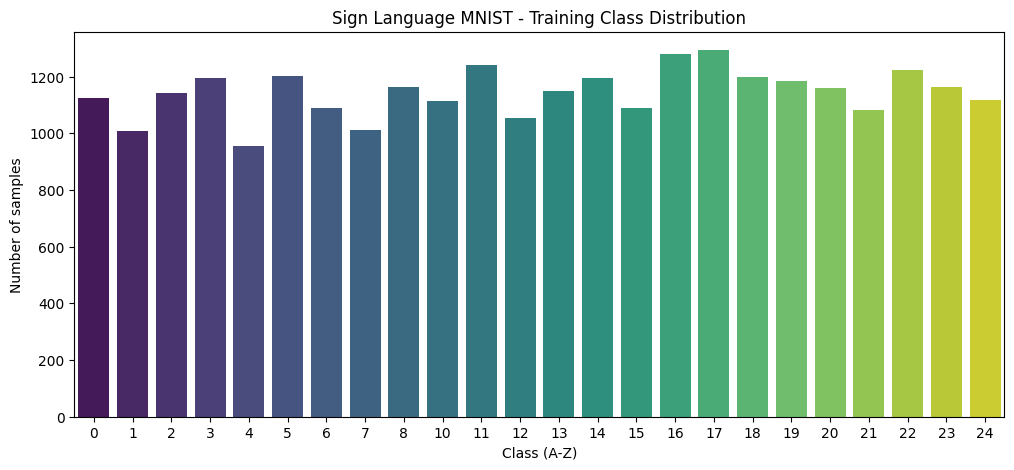

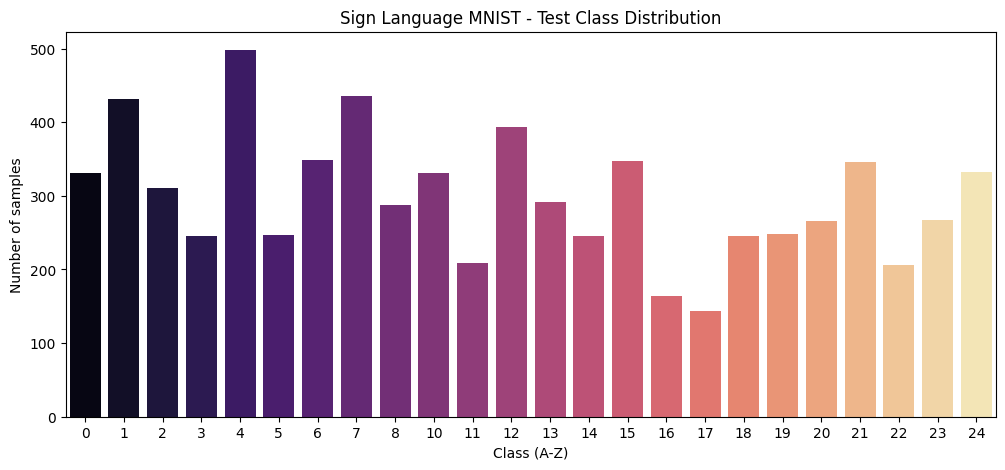

Class Distribution Report (Training & Test sets)
Class | Train Count | Train % | Test Count | Test %
  A   |    1126     |  4.10% |     331     |  4.62%
  B   |    1010     |  3.68% |     432     |  6.02%
  C   |    1144     |  4.17% |     310     |  4.32%
  D   |    1196     |  4.36% |     245     |  3.42%
  E   |     957     |  3.49% |     498     |  6.94%
  F   |    1204     |  4.39% |     247     |  3.44%
  G   |    1090     |  3.97% |     348     |  4.85%
  H   |    1013     |  3.69% |     436     |  6.08%
  I   |    1162     |  4.23% |     288     |  4.02%
  K   |    1114     |  4.06% |     331     |  4.62%
  L   |    1241     |  4.52% |     209     |  2.91%
  M   |    1055     |  3.84% |     394     |  5.49%
  N   |    1151     |  4.19% |     291     |  4.06%
  O   |    1196     |  4.36% |     246     |  3.43%
  P   |    1088     |  3.96% |     347     |  4.84%
  Q   |    1279     |  4.66% |     164     |  2.29%
  R   |    1294     |  4.71% |     144     |  2.01%
  S   |    1199

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

# Suppress Seaborn FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Convert one-hot labels back to integer for visualization
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute metrics
classes = sorted(set(y_train_labels))
train_counts = [np.sum(y_train_labels == c) for c in classes]
test_counts = [np.sum(y_test_labels == c) for c in classes]
train_percent = [count/len(y_train_labels)*100 for count in train_counts]
test_percent = [count/len(y_test_labels)*100 for count in test_counts]

# Plot training class distribution
plt.figure(figsize=(12,5))
sns.countplot(x=y_train_labels, palette="viridis", hue=None, legend=False)
plt.title("Sign Language MNIST - Training Class Distribution")
plt.xlabel("Class (A-Z)")
plt.ylabel("Number of samples")
plt.show()

# Plot test class distribution
plt.figure(figsize=(12,5))
sns.countplot(x=y_test_labels, palette="magma", hue=None, legend=False)
plt.title("Sign Language MNIST - Test Class Distribution")
plt.xlabel("Class (A-Z)")
plt.ylabel("Number of samples")
plt.show()

# Print textual report
print("Class Distribution Report (Training & Test sets)")
print("Class | Train Count | Train % | Test Count | Test %")
for c, tc, tp, tec, tep in zip(classes, train_counts, train_percent, test_counts, test_percent):
    print(f"  {chr(c+65)}   |    {tc:4d}     | {tp:5.2f}% |    {tec:4d}     | {tep:5.2f}%")


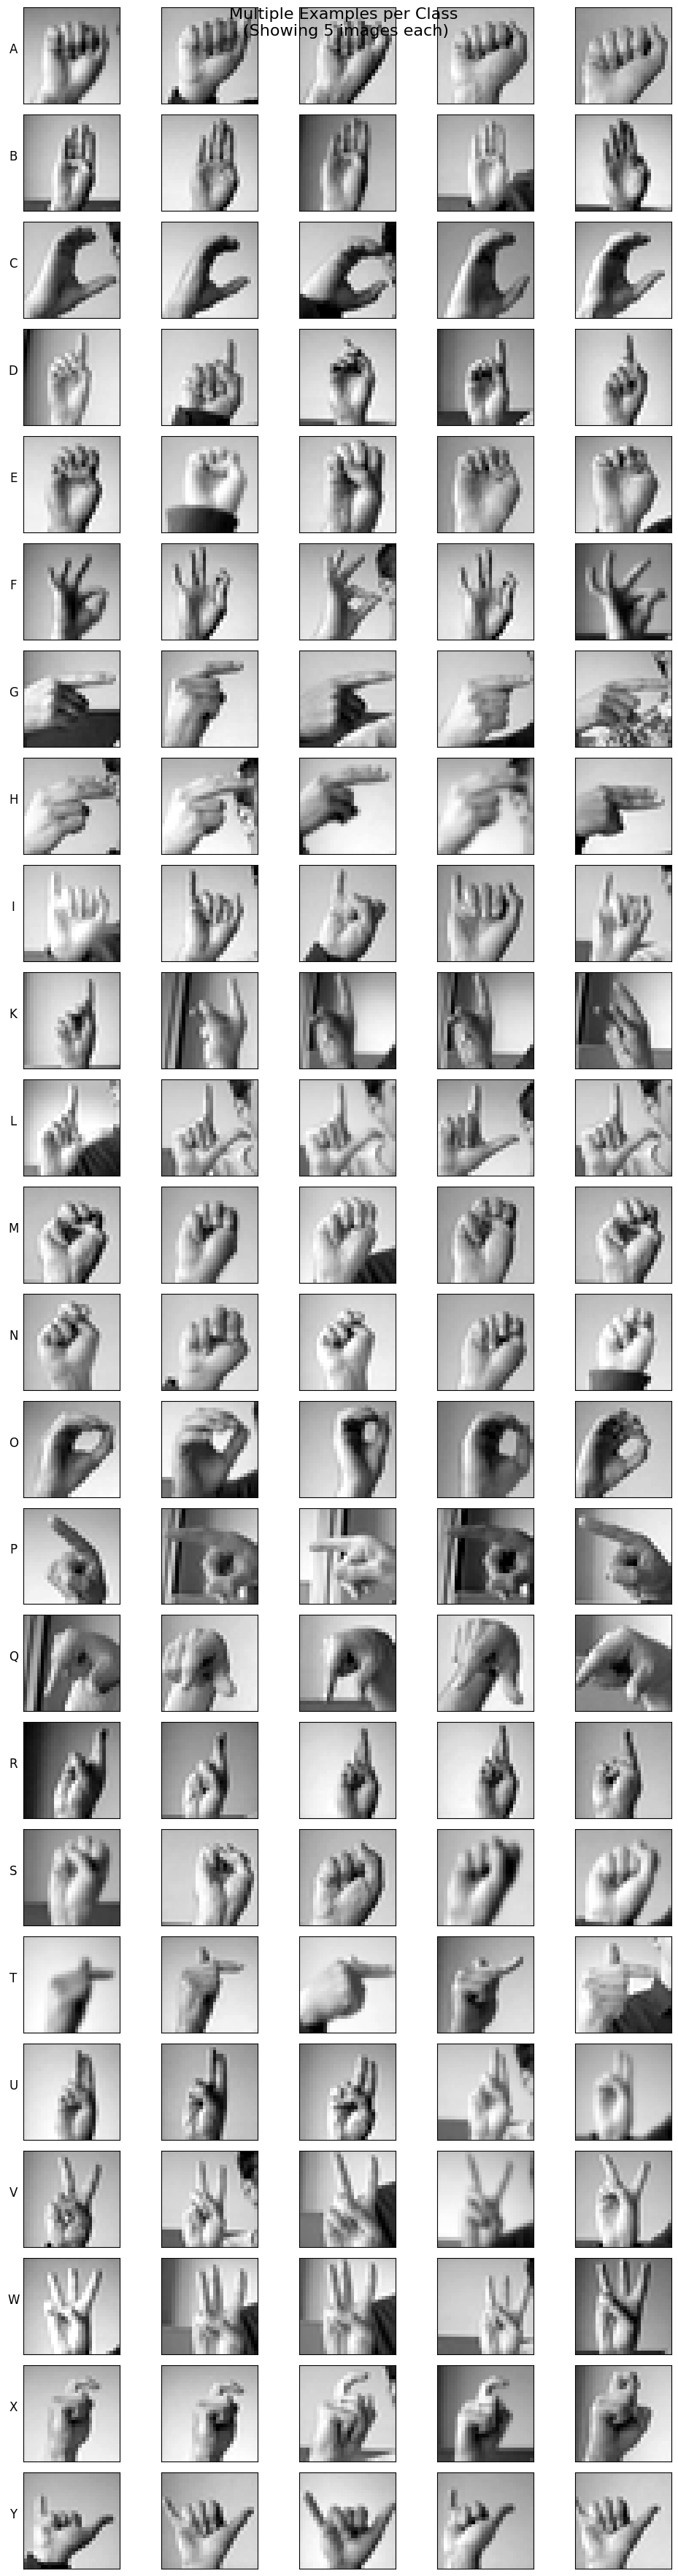

In [4]:
# Number of examples per class to show
examples_per_class = 5

# Get unique classes
classes = sorted(set(y_train_labels))

plt.figure(figsize=(examples_per_class*2, len(classes)*1.5))

plot_idx = 1
for c in classes:
    # Get indices of all samples for class c
    class_indices = np.where(y_train_labels == c)[0]
    # Randomly sample examples_per_class images
    sampled_indices = np.random.choice(class_indices, examples_per_class, replace=False)

    for i, idx in enumerate(sampled_indices):
        plt.subplot(len(classes), examples_per_class, plot_idx)
        plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
        if i == 0:
            plt.ylabel(chr(c+65), rotation=0, labelpad=10, fontsize=12)
        plt.xticks([])
        plt.yticks([])
        plot_idx += 1

plt.suptitle(f"Multiple Examples per Class \n(Showing {examples_per_class} images each)", fontsize=16)
plt.tight_layout()
plt.show()

#Baseline Model
- Simple dense model with 3 layers using Adam optimizer
- Train for 5+ epochs with no optimizations

Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2043 - loss: 2.7267 - val_accuracy: 0.4728 - val_loss: 1.6879
Epoch 2/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5531 - loss: 1.4036 - val_accuracy: 0.5385 - val_loss: 1.4712
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6717 - loss: 1.0445 - val_accuracy: 0.6205 - val_loss: 1.2183
Epoch 4/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7587 - loss: 0.7926 - val_accuracy: 0.6167 - val_loss: 1.1919
Epoch 5/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8170 - loss: 0.6111 - val_accuracy: 0.6666 - val_loss: 1.0922


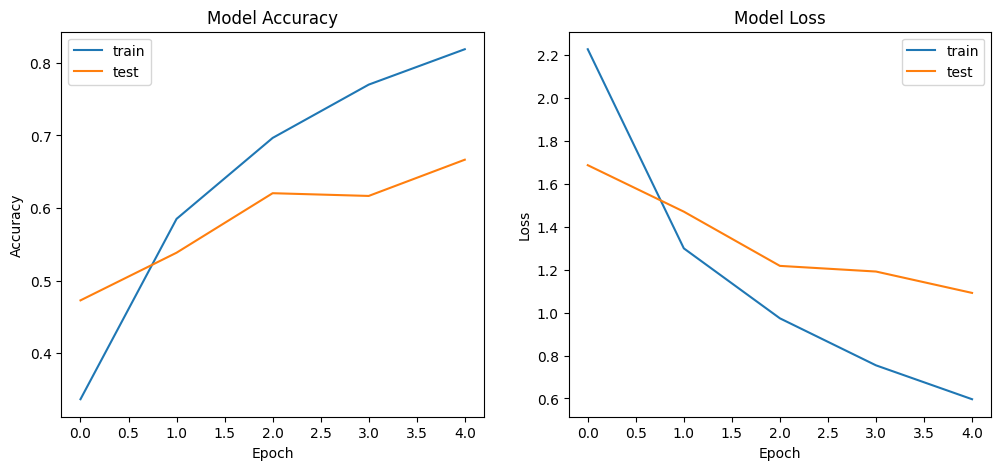

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Flatten(input_shape=(28,28,1)),  # Flatten 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes
])

# Compile model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Optimized Models
- implement 3 optimizers (Adam, SGD, RMSProp)
- Add Dropout, Batch Normalization, or L2 Regularization
- Compare model performance


Training model with ADAM optimizer...



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.5994 - loss: 1.7110 - val_accuracy: 0.4430 - val_loss: 2.1107
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9792 - loss: 0.3225 - val_accuracy: 0.9398 - val_loss: 0.4118
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9905 - loss: 0.2323 - val_accuracy: 0.9095 - val_loss: 0.5648
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9924 - loss: 0.1897 - val_accuracy: 0.8391 - val_loss: 0.7305
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9871 - loss: 0.1911 - val_accuracy: 0.9396 - val_loss: 0.3676
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9927 - loss: 0.1590 - val_accuracy: 0.8597 - val_loss: 0.7300
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.9894 - loss: 0.1690 - val_accuracy: 0.9127 - val_loss: 0.5202
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9911 - loss: 0.1756 - 

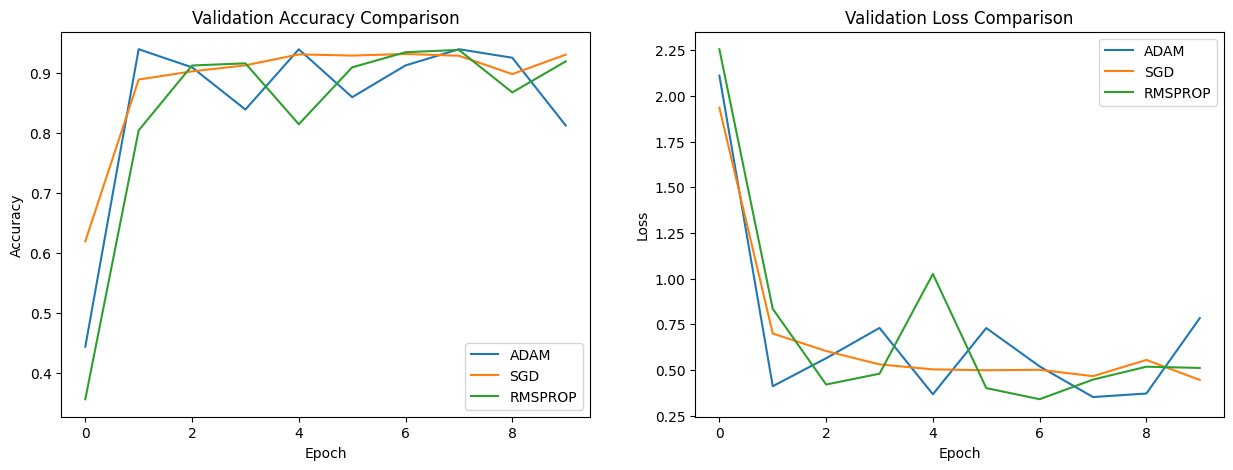

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def build_model(optimizer='adam', use_dropout=False, use_batchnorm=False, l2_reg=0.0):
    model = Sequential()

    # Convolutional block
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1),
                     kernel_regularizer=l2(l2_reg) if l2_reg>0 else None))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Second convolutional block
    model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(l2_reg) if l2_reg>0 else None))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    # Dense layer
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_reg) if l2_reg>0 else None))
    if use_dropout:
        model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(26, activation='softmax'))

    # Optimizer selection
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

optimizers = ['adam', 'sgd', 'rmsprop']
histories = {}

for opt in optimizers:
    print(f"\nTraining model with {opt.upper()} optimizer...\n")
    model = build_model(optimizer=opt, use_dropout=True, use_batchnorm=True, l2_reg=0.001)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=64,
        verbose=1
    )

    histories[opt] = history

plt.figure(figsize=(15,5))

# Accuracy comparison
plt.subplot(1,2,1)
for opt in optimizers:
    plt.plot(histories[opt].history['val_accuracy'], label=f'{opt.upper()}')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss comparison
plt.subplot(1,2,2)
for opt in optimizers:
    plt.plot(histories[opt].history['val_loss'], label=f'{opt.upper()}')
plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Evaluation & Visualizaiton
- Accuracy/loss curves
- Confusion matrix
- Classification reports
- Summary comparison table

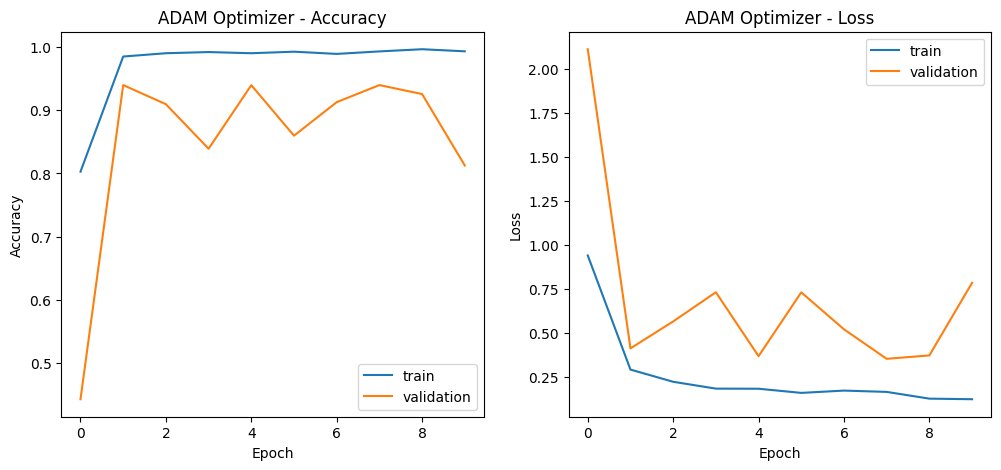

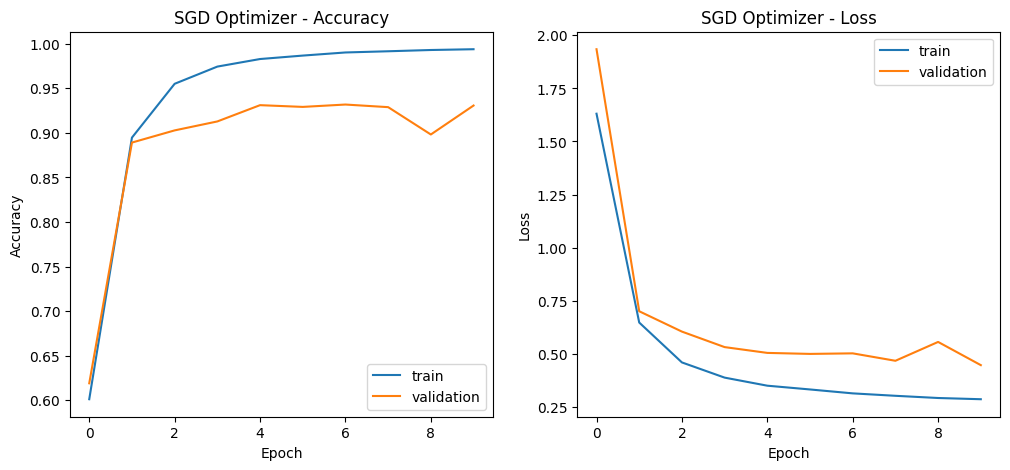

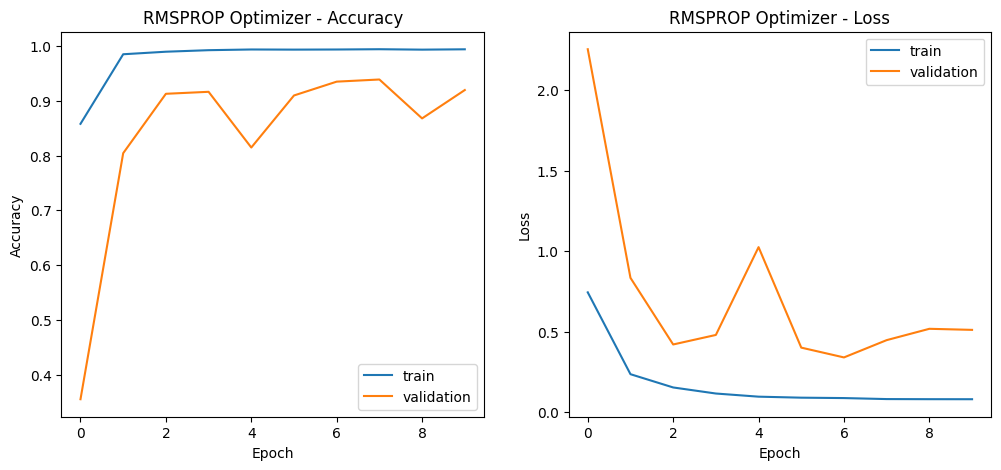

In [21]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model Performance"):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

for opt, hist in histories.items():
    plot_history(hist, title=f"{opt.upper()} Optimizer")

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


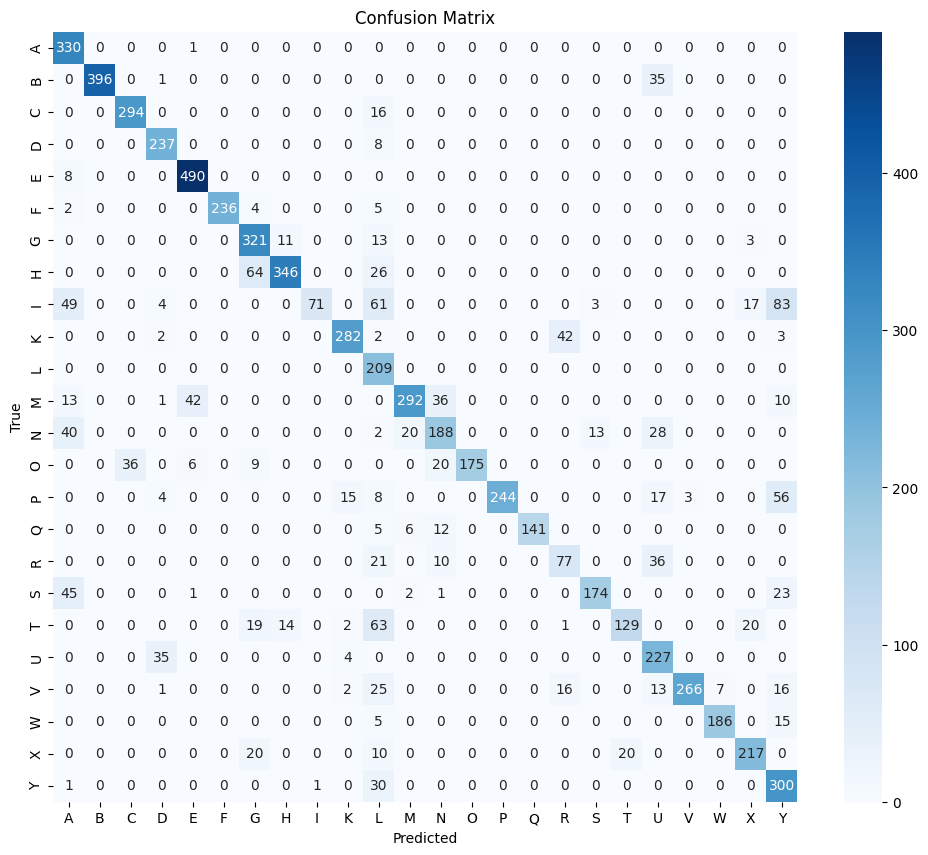

In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X, y_true, classes):
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true_labels, y_pred_labels)

    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

classes = [chr(i+65) for i in sorted(set(y_train_labels))]
plot_confusion_matrix(histories['adam'].model, X_test, y_test, classes)

In [24]:
from sklearn.metrics import classification_report

def print_classification_report(model, X, y_true, classes):
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)

    report = classification_report(y_true_labels, y_pred_labels, target_names=classes)
    print(report)

print_classification_report(histories['adam'].model, X_test, y_test, classes)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
              precision    recall  f1-score   support

           A       0.68      1.00      0.81       331
           B       1.00      0.92      0.96       432
           C       0.89      0.95      0.92       310
           D       0.83      0.97      0.89       245
           E       0.91      0.98      0.94       498
           F       1.00      0.96      0.98       247
           G       0.73      0.92      0.82       348
           H       0.93      0.79      0.86       436
           I       0.99      0.25      0.39       288
           K       0.92      0.85      0.89       331
           L       0.41      1.00      0.58       209
           M       0.91      0.74      0.82       394
           N       0.70      0.65      0.67       291
           O       1.00      0.71      0.83       246
           P       1.00      0.70      0.83       347
           Q       1.00      0.86      0.92       164
           R       0.57      0.53      

In [26]:
import pandas as pd

summary_data = []
for opt, hist in histories.items():
    final_train_acc = hist.history['accuracy'][-1]
    final_val_acc = hist.history['val_accuracy'][-1]
    final_train_loss = hist.history['loss'][-1]
    final_val_loss = hist.history['val_loss'][-1]

    summary_data.append({
        'Optimizer': opt.upper(),
        'Train Accuracy': f"{final_train_acc:.4f}",
        'Validation Accuracy': f"{final_val_acc:.4f}",
        'Train Loss': f"{final_train_loss:.4f}",
        'Validation Loss': f"{final_val_loss:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by='Validation Accuracy', ascending=False)
summary_df

,Optimizer,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
1,SGD,0.9939,0.9307,0.2855,0.4462
2,RMSPROP,0.9937,0.9194,0.0810,0.5118
0,ADAM,0.9932,0.8126,0.1231,0.7840


# Reflection
- Analyze optimizer and regularization impacts
- Identify hardest classes to classify
- Propose further improvements

# Optimizer and Regularization Impacts
## Optimizer Behavior and Performance Analysis

The performance of the model varied significantly across the three optimizers tested: SGD, RMSProp, and Adam. These differences reflect well-documented behaviors in the deep learning literature and offer insight into how each optimizer affects convergence, generalization, and stability.

The model trained with SGD achieved the strongest overall generalization. Although SGD typically converges more slowly than adaptive methods, it tends to settle into flatter minima in the loss landscape, which often correspond to more stable performance on unseen data. The validation accuracy of 93.07% and relatively low validation loss indicate that SGD offered the best balance of learning and regularization among the optimizers evaluated.

In contrast, RMSProp exhibited very rapid convergence, achieving extremely low training loss early in the training process. However, this came at the cost of increased overfitting. The model memorized the training data, as evidenced by the training loss of 0.0810, yet did not generalize as effectively as the SGD-trained model. The validation loss remained comparatively high, signaling confidence miscalibration and instability despite decent validation accuracy.

The Adam optimizer demonstrated the most pronounced overfitting. Adam often converges quickly due to its adaptive learning rate behavior, but without substantial regularization it has a tendency to reach sharp minima that do not generalize well. This pattern is reflected in the substantial gap between training and validation performance, where validation accuracy fell to 81.26% with a significantly elevated validation loss. These results align with known characteristics of Adam in image classification tasks when regularization is limited.

Overall, the optimizer comparison highlights that while adaptive optimizers quickly reduce training error, SGD can offer superior generalization in practice unless extensive regularization is employed.

| Optimizer | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss | Notes                                                   |
|-----------|----------------|----------------------|------------|------------------|---------------------------------------------------------|
| SGD       | 0.9939         | 0.9307               | 0.2855     | 0.4462           | Best generalization and stable performance              |
| RMSProp   | 0.9937         | 0.9194               | 0.0810     | 0.5118           | Very fast overfitting and confidence miscalibration     |
| Adam      | 0.9932         | 0.8126               | 0.1231     | 0.7840           | Most pronounced overfitting and weakest performance     |


## Effects of Regularization and Model Architecture

The high training accuracy across all optimizers (consistently above 99%) indicates that the model architecture was sufficiently expressive to learn the training distribution. However, the variance in validation performance suggests that the applied regularization strategies were partially effective but not fully adequate to prevent overfitting.

Dropout likely contributed to reducing co-adaptation of neurons, and batch normalization helped stabilize optimization. However, these measures alone were not enough for the adaptive optimizers, whose aggressive gradient behavior can lead to rapid memorization. Notably, L2 regularization (weight decay) was not applied, which is a key technique for constraining weight magnitude and improving generalization, especially when using Adam or RMSProp. The absence of L2 weight decay likely contributed significantly to the observed overfitting.

Furthermore, the model may not be deep enough to capture fine-grained spatial distinctions between certain visually similar gesture classes. Expanding the model architecture or incorporating residual connections could provide more robust feature extraction and improve performance on challenging classes.

# Identify Classification Difficulty
## Class-Level Difficulty and Error Patterns

A detailed examination of the classification report reveals three distinct groups of classes based on performance.

The first group includes classes that were reliably classified, such as A, B, C, D, E, F, G, O, Q, V, and W. These classes likely contain visually distinct gestures with consistent representation across the dataset.

A second group, including N, T, U, and X, exhibited moderate difficulty. These classes may share structural similarities with other gestures or exhibit variability in representation that requires more expressive models to disambiguate effectively.

The final group represents the most challenging classes for the model: I, L, R, and Y. Class I displayed extremely low recall, indicating that the model rarely recognized this class and frequently misclassified it. Class L showed low precision, meaning it was predicted too frequently relative to its true occurrences. Classes R and Y suffered from reduced precision and recall overall. These error patterns suggest substantial visual overlap or subtle gesture differences that the current model struggled to capture.

The difficulty of these classes underscores the need for more robust feature extraction, targeted training strategies, or increased regularization to encourage the model to learn more discriminative representations.

| Class | Precision | Recall | F1   | Problem                                                 |
|-------|-----------|--------|------|----------------------------------------------------------|
| I     | 0.99      | 0.25   | 0.39 | Almost all I’s misclassified as something else           |
| L     | 0.41      | 1.00   | 0.58 | Predicts L too often (over-generalization)               |
| R     | 0.57      | 0.53   | 0.55 | Weak on both precision and recall                        |
| Y     | 0.59      | 0.90   | 0.72 | Predicts Y too often                                     |


# Recommendations For Improvement
## Strengthening Generalization

Introducing L2 weight decay is recommended, as it constrains the magnitude of model weights and reduces overfitting, especially for Adam and RMSProp. Increasing dropout rates, for example to 0.3–0.4 in convolutional layers and approximately 0.5 in dense layers, may also enhance robustness. Implementing a learning rate schedule such as ReduceLROnPlateau would further stabilize convergence and improve optimization, particularly with SGD.

## Enhancing Model Architecture

A deeper convolutional architecture is likely to improve performance, especially for subtle gesture distinctions. Expanding the network to include three or four convolutional blocks with increasing filter counts would yield richer spatial feature extraction. Replacing the flattening operation with GlobalAveragePooling2D could reduce the number of parameters and lower overfitting risk. The addition of residual connections, similar to those used in ResNet architectures, would also increase representational capacity and training stability.

## Addressing Difficult Classes Directly

Targeted data augmentation can help the model learn more robust representations for challenging classes. Applying controlled rotations, shear transformations, or brightness variations specifically to classes such as I, L, R, and Y may improve class separability. The use of focal loss could additionally enhance performance by placing more emphasis on examples that are difficult to classify.

## Improving Diagnostic and Evaluation Techniques

More in-depth evaluation techniques would help identify and correct misclassification patterns. Confusion matrix overlays or per-class error visualizations could reveal which gestures are being confused. Techniques such as Grad-CAM would provide insight into the spatial features the model focuses on, potentially highlighting areas where the current architecture lacks discriminatory power.

#Summary

The results of this project demonstrate clear distinctions in optimizer behavior, with SGD providing the best generalization and Adam and RMSProp exhibiting strong tendencies toward overfitting without additional regularization. Several classes were reliably classified, while others presented significant challenges due to visual similarity or representational subtlety. Enhancing regularization, refining the network architecture, and applying targeted augmentation would likely lead to substantial gains in overall accuracy and robustness. Continued analysis using advanced diagnostic tools could further guide improvements and support the development of a more reliable and generalizable gesture classification model.